In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier#1
from sklearn.tree import DecisionTreeClassifier#2
from sklearn.ensemble import RandomForestClassifier#3
from sklearn.linear_model import LogisticRegression#4
from sklearn.svm import SVC#5
from xgboost import XGBClassifier#6
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support, classification_report
from sklearn import preprocessing
from PIL import Image
import skimage
from PIL import Image
import IPython.display as display
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [2]:
def image_to_feature_vector(image, size=(150, 150)):
        
     # resize the image to a fixed size, then flatten the image into
     # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(32, 32, 32)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	hist = cv2.calcHist([rgb], [0, 1, 2], None, bins,[0, 256, 0, 256, 0, 256])

	# handle normalizing the histogram if we are using OpenCV 2.4.X
	hist = cv2.normalize(hist, hist)
	flatten_feature = hist.flatten()
	# return the flattened histogram as the feature vector
	return flatten_feature

In [6]:
#dataset1


dir1 = '/content/drive/MyDrive/ALL_new'
#dir1 = 'E:/Heart/Universal/final'
def fetch_cataract(dir):
    raw_image = []
    health_state =[]
    features = []
    c=0

    for filename in os.listdir(dir1):
        category = filename.split('_')[0]
        if category == 'cat':
                health_state.append(1)
        else:
                health_state.append(0)
        image =cv2.imread(os.path.join(dir1,filename))
        flatten_feature = extract_color_histogram(image, bins=(32, 32, 32))
        pixel = image_to_feature_vector(image, size=(150, 150))
        raw_image.append(pixel)
        features.append(flatten_feature)
    raw_image = np.array(raw_image)
    health_state = np.array(health_state)
    features = np.array(features)
    #df=pd.DataFrame({ 'pixel_image':os.listdir(dir1), 'features':features, 'HEALTH':health_state})
    return raw_image, health_state, features 
raw_image, health_state, features = fetch_cataract(dir1)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
(trainX, testX, trainY, testY ) = train_test_split(features, health_state, test_size= 0.3, random_state=20,shuffle=True)

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(112, 32768)
(112,)
(49, 32768)
(49,)


In [8]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,roc_curve,f1_score, auc

#KNN

y_pred_xgb= [1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0
 1 1 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.7755102040816326
Classification Report : 

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.81      0.71      0.76        24

    accuracy                           0.78        49
   macro avg       0.78      0.77      0.77        49
weighted avg       0.78      0.78      0.77        49

Classification Report train : 

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        60
           1       0.88      0.87      0.87        52

    accuracy                           0.88       112
   macro avg       0.88      0.88      0.88       112
weighted avg       0.88      0.88      0.88       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

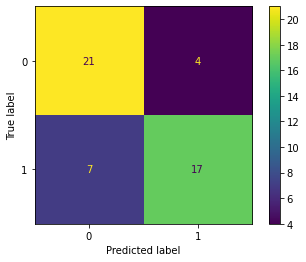

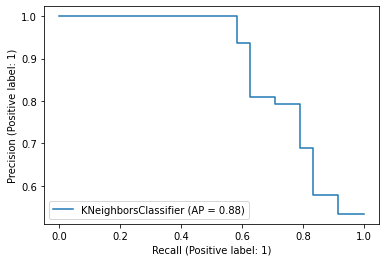

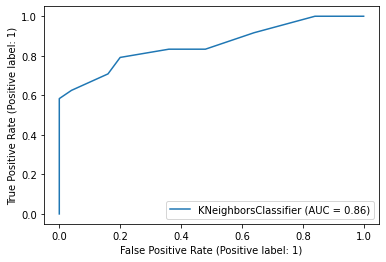

In [ ]:
#KNN
model_KNN=KNeighborsClassifier(n_neighbors=10)
model_KNN.fit(trainX,trainY)
y_pred_Test = model_KNN.predict(testX)
y_pred_Train = model_KNN.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

KNeighborsClassifier = KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier= KNeighborsClassifier.fit(trainX, trainY)
plot_confusion_matrix(KNeighborsClassifier,testX,testY)
plot_precision_recall_curve(KNeighborsClassifier,testX,testY)
plot_roc_curve(KNeighborsClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of KNN
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=KNeighborsClassifier)

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(KNeighborsClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(KNeighborsClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.8823529411764706
0.9375
0.875
0.9375
0.875
0.875
0.9375
0.9375
1.0
0.875
0.913235294117647


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
cross_val_score = cross_val_score(KNeighborsClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 86.47058823529412


##Grid_serach on KNN

###:**Repeating all with Grid search (fine tuning the hyperparameters)**

In [9]:
from sklearn.model_selection import GridSearchCV

y_pred_KNN= [1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8775510204081632
Classification Report : 

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        25
           1       1.00      0.75      0.86        24

    accuracy                           0.88        49
   macro avg       0.90      0.88      0.88        49
weighted avg       0.90      0.88      0.88        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

The testing F1 Score is 0.8571428571428571
The testing Accuracy is 0.8775510204081632
best parameters are:  KNeighborsClassifier(leaf_size=10, n_neighbors=10, p=1, weights='distance')


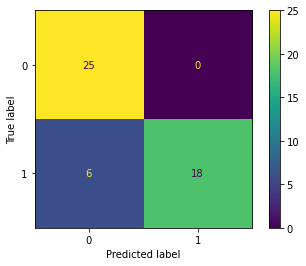

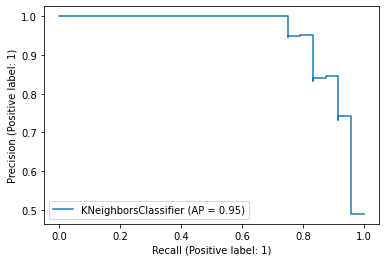

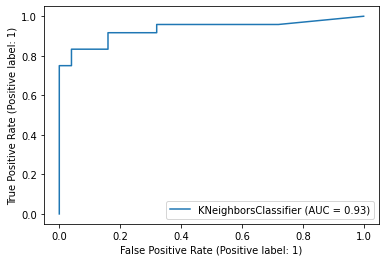

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier #Imorting models repeatedly becuase of this error "'KNeighborsClassifier' object is not callable"
scorer = make_scorer(f1_score)
parameters = {'n_neighbors':[15,8,10,5,20],'weights':['uniform','distance'], 'algorithm':['auto'], 'leaf_size':[10,15,25,30],
              'p':[2,1] }
clf = KNeighborsClassifier()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(trainX,trainY)
best_clf = grid_fit.best_estimator_
best_clf.fit(trainX, trainY)

y_pred_Test = best_clf.predict(testX)
y_pred_Train = best_clf.predict(trainX)

test_acc = accuracy_score(testY, y_pred_Test)

print("y_pred_KNN=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))


plot_confusion_matrix(best_clf,testX,testY)
plot_precision_recall_curve(best_clf,testX,testY)
plot_roc_curve(best_clf,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of KNN
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=best_clf)
print('The testing F1 Score is', f1_score(y_pred_Test, testY))
print('The testing Accuracy is', accuracy_score(y_pred_Test, testY))
print('best parameters are: ',best_clf)



In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(best_clf, X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(best_clf, X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print('stratified_k-fold_results: ',statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.8823529411764706
1.0
0.9375
1.0
1.0
0.875
0.9375
0.8125
0.9375
0.8125
stratified_k-fold_results:  0.919485294117647


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
KNeighborsClassifier = best_clf
cross_val_score = cross_val_score(KNeighborsClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 88.38235294117646


Since results on train set are way too much better than those on test set, we're gonna make sure that our model is not overfit

#Decision Tree

y_pred_xgb= [1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8571428571428571
Classification Report : 

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.95      0.75      0.84        24

    accuracy                           0.86        49
   macro avg       0.87      0.85      0.85        49
weighted avg       0.87      0.86      0.86        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

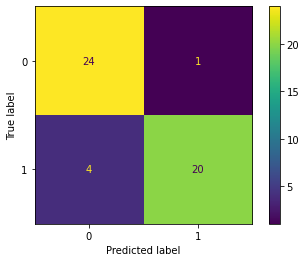

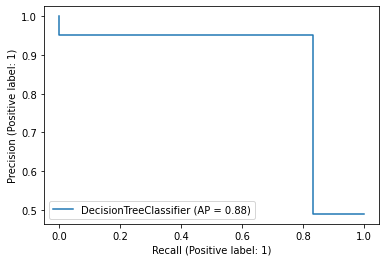

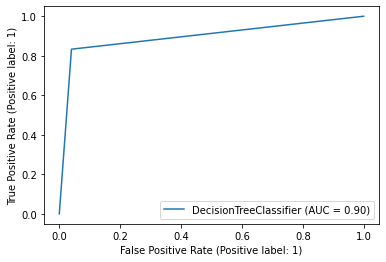

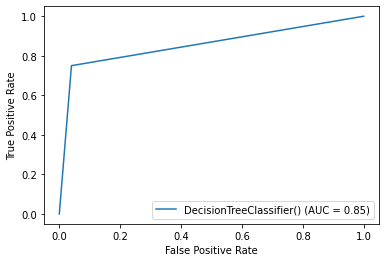

In [ ]:
#Decision Tree
model_DT=DecisionTreeClassifier()
model_DT.fit(trainX,trainY)
y_pred_Test = model_DT.predict(testX)
y_pred_Train = model_DT.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier= DecisionTreeClassifier.fit(trainX, trainY)
plot_confusion_matrix(DecisionTreeClassifier,testX,testY)
plot_precision_recall_curve(DecisionTreeClassifier,testX,testY)
plot_roc_curve(DecisionTreeClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of Decision Tree 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=DecisionTreeClassifier)
display.plot()

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(DecisionTreeClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(DecisionTreeClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

1.0
1.0
1.0
0.9375
0.9375
0.9375
0.9375
0.8125
0.9375
0.875
0.9128676470588235


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier()
cross_val_score = cross_val_score(DecisionTreeClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 94.52205882352942


## Grid_search on Decision Tree

###**Repeating all with Grid search (fine tuning the hyperparameters)**

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5760 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 221, in fit
    self.class_weight, y_original
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/cla

y_pred_KNN= [1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8775510204081632
Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.95      0.79      0.86        24

    accuracy                           0.88        49
   macro avg       0.89      0.88      0.88        49
weighted avg       0.89      0.88      0.88        49

Classification Report train : 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.98      0.98        52

    accuracy                           0.98       112
   macro avg       0.98      0.98      0.98       112
weighted avg       0.98      0.98      0.98       112

The testing F1 Score is 0.8636363636363635
The testing Accuracy is 0.8775510204081632
best parameters are:  DecisionTreeClassifie

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

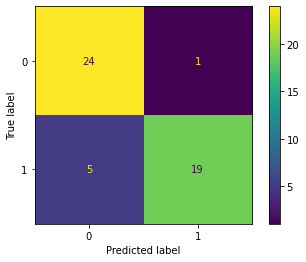

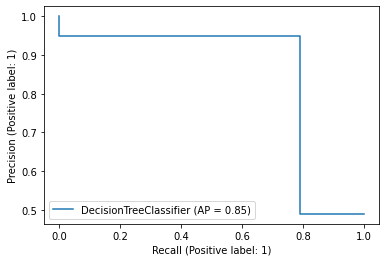

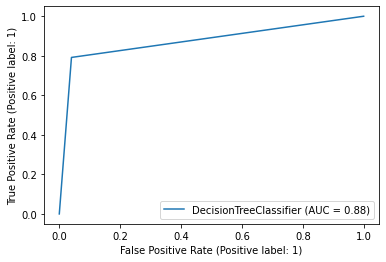

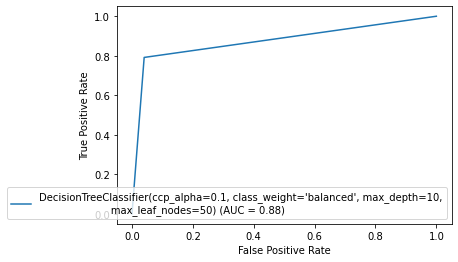

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier #Imorting models repeatedly becuase of this error "'KNeighborsClassifier' object is not callable"
scorer = make_scorer(f1_score)
parameters = {'criterion':['gini', 'entropy'],'splitter':['best', 'random'], 'max_depth':[10,20,30,18], 'max_leaf_nodes':[100,50,25,30],
              'class_weight':['multi-output','balanced'], 'ccp_alpha' :[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]}
clf = DecisionTreeClassifier()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(trainX,trainY)
best_clf = grid_fit.best_estimator_
best_clf.fit(trainX, trainY)

y_pred_Test = best_clf.predict(testX)
y_pred_Train = best_clf.predict(trainX)

test_acc = accuracy_score(testY, y_pred_Test)

print("y_pred_KNN=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))


plot_confusion_matrix(best_clf,testX,testY)
plot_precision_recall_curve(best_clf,testX,testY)
plot_roc_curve(best_clf,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of KNN
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=best_clf)
print('The testing F1 Score is', f1_score(y_pred_Test, testY))
print('The testing Accuracy is', accuracy_score(y_pred_Test, testY))
print('best parameters are: ',best_clf)
display.plot()

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(best_clf, X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(best_clf, X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print('stratified_k-fold_results: ',statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.8823529411764706
1.0
1.0
1.0
0.9375
0.9375
0.9375
0.8125
0.875
0.9375
stratified_k-fold_results:  0.9319852941176471


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
KNeighborsClassifier = best_clf
cross_val_score = cross_val_score(KNeighborsClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 93.89705882352942


##RandomForestClassifier

y_pred_xgb= [1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.9387755102040817
Classification Report : 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.88      0.93        24

    accuracy                           0.94        49
   macro avg       0.95      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

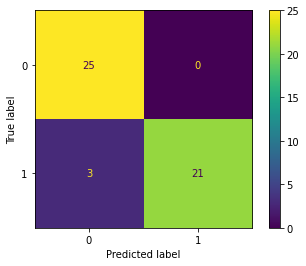

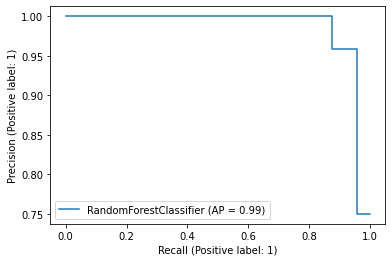

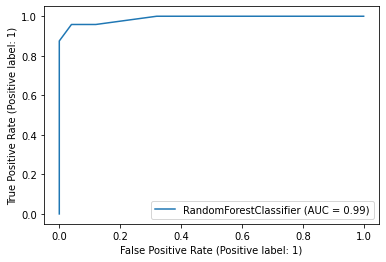

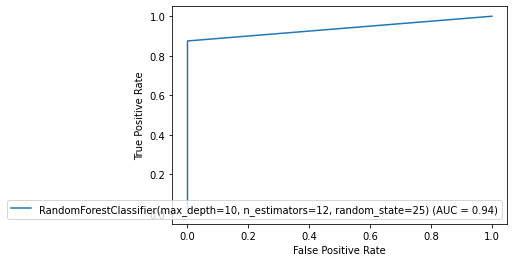

In [ ]:
#Random Forest
model_RF=RandomForestClassifier(n_estimators =12, max_depth =10, random_state=25) 
model_RF.fit(trainX,trainY)
y_pred_Test = model_RF.predict(testX)
y_pred_Train = model_RF.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

RandomForestClassifier = RandomForestClassifier(n_estimators =12, max_depth =10, random_state=25) 
RandomForestClassifier= RandomForestClassifier.fit(trainX, trainY)
plot_confusion_matrix(RandomForestClassifier,testX,testY)
plot_precision_recall_curve(RandomForestClassifier,testX,testY)
plot_roc_curve(RandomForestClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of Random Forest 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=RandomForestClassifier)
display.plot()

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(RandomForestClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(RandomForestClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print('stratified_k-fold_results: ',statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

1.0
1.0
0.9375
1.0
1.0
0.9375
1.0
1.0
0.9375
0.9375
stratified_k-fold_results:  0.975


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
cross_val_score = cross_val_score(RandomForestClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 97.57352941176471


## Grid_search on Randomforest classifier

###**Repeating all with Grid search (fine tuning the hyperparameters)**

y_pred_KNN= [1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.9591836734693877
Classification Report : 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        24

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49

Classification Report train : 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        52

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112

The testing F1 Score is 0.9565217391304348
The testing Accuracy is 0.9591836734693877
best parameters are:  RandomForestClassifie

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

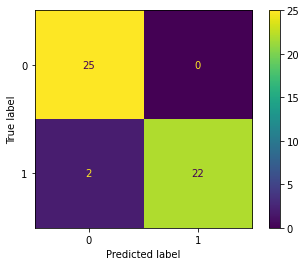

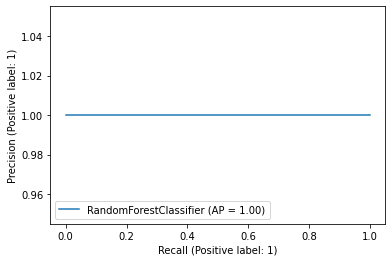

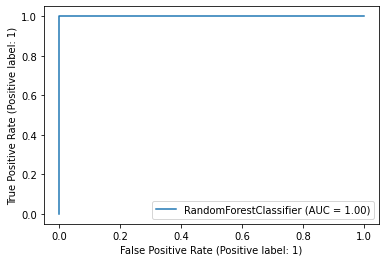

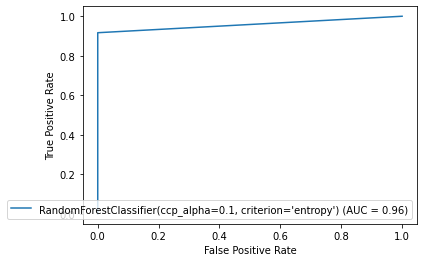

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier #Imorting models repeatedly becuase of this error "'KNeighborsClassifier' object is not callable"
scorer = make_scorer(f1_score)
parameters = {'criterion':['gini', 'entropy'],'ccp_alpha' :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(trainX,trainY)
best_clf = grid_fit.best_estimator_
best_clf.fit(trainX, trainY)

y_pred_Test = best_clf.predict(testX)
y_pred_Train = best_clf.predict(trainX)

test_acc = accuracy_score(testY, y_pred_Test)

print("y_pred_KNN=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))


plot_confusion_matrix(best_clf,testX,testY)
plot_precision_recall_curve(best_clf,testX,testY)
plot_roc_curve(best_clf,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of KNN
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=best_clf)
print('The testing F1 Score is', f1_score(y_pred_Test, testY))
print('The testing Accuracy is', accuracy_score(y_pred_Test, testY))
print('best parameters are: ',best_clf)
display.plot()

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(best_clf, X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(best_clf, X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print('stratified_k-fold_results: ',statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

1.0
1.0
0.9375
1.0
0.9375
0.9375
1.0
0.8125
0.9375
0.9375
stratified_k-fold_results:  0.95625


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
KNeighborsClassifier = best_clf
cross_val_score = cross_val_score(KNeighborsClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 94.00735294117646


##Logistic Regression

y_pred_xgb= [1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8163265306122449
Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.89      0.71      0.79        24

    accuracy                           0.82        49
   macro avg       0.83      0.81      0.81        49
weighted avg       0.83      0.82      0.81        49

Classification Report train : 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.92      0.88      0.90        52

    accuracy                           0.91       112
   macro avg       0.91      0.91      0.91       112
weighted avg       0.91      0.91      0.91       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

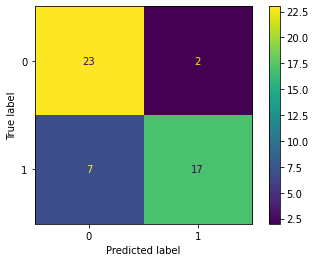

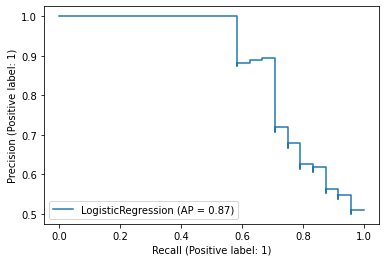

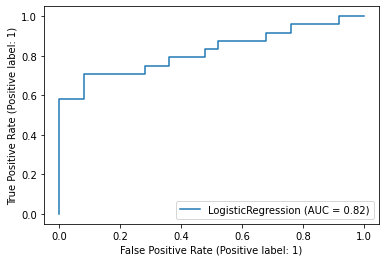

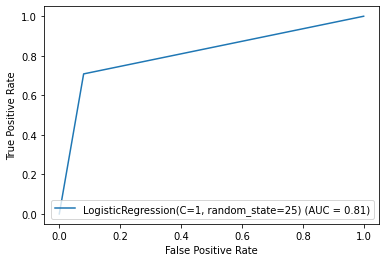

In [ ]:
#Logistic Regression
model_LR= LogisticRegression(penalty ='l2',C=1,random_state=25)
model_LR.fit(trainX,trainY)
y_pred_Test = model_LR.predict(testX)
y_pred_Train = model_LR.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

LogisticRegression = LogisticRegression(penalty ='l2',C=1,random_state=25)
LogisticRegression= LogisticRegression.fit(trainX, trainY)
plot_confusion_matrix(LogisticRegression,testX,testY)
plot_precision_recall_curve(LogisticRegression,testX,testY)
plot_roc_curve(LogisticRegression,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of Logistic Regression 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=LogisticRegression)
display.plot()

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(LogisticRegression(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(LogisticRegression(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.7647058823529411
0.8125
0.9375
0.9375
0.9375
0.8125
0.9375
0.875
0.875
0.75
0.8639705882352942


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
cross_val_score = cross_val_score(LogisticRegression,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 82.75735294117646


## Grid_search on Logistic Regression

###**Repeating all with Grid search (fine tuning the hyperparameters)**

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

y_pred_KNN= [1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8163265306122449
Classification Report : 

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.89      0.71      0.79        24

    accuracy                           0.82        49
   macro avg       0.83      0.81      0.81        49
weighted avg       0.83      0.82      0.81        49

Classification Report train : 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.98      0.96      0.97        52

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112

The testing F1 Score is 0.7906976744186046
The testing Accuracy is 0.8163265306122449
best parameters are:  LogisticRegression(C=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

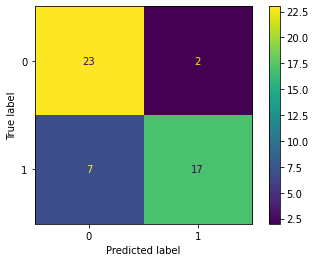

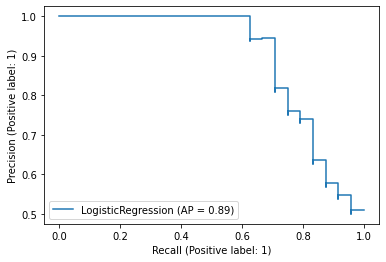

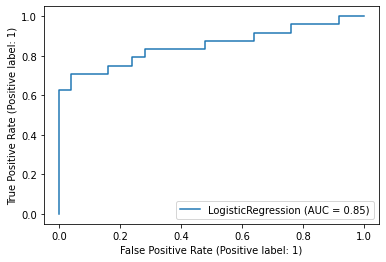

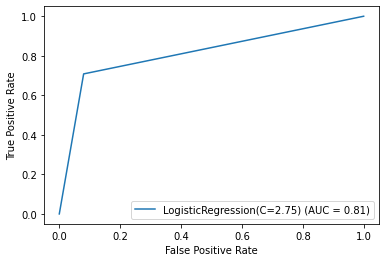

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression #Imorting models repeatedly becuase of this error "'KNeighborsClassifier' object is not callable"
scorer = make_scorer(f1_score)
parameters = {'penalty':['l1', 'l2', 'elasticnet'],'tol':[1e-4,2e-4,3e-5],'C':[1.0, 0.5, 2.75,2.5,3.25,3.75]}


from sklearn.ensemble import RandomForestClassifier
clf = LogisticRegression()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(trainX,trainY)
best_clf = grid_fit.best_estimator_
best_clf.fit(trainX, trainY)

y_pred_Test = best_clf.predict(testX)
y_pred_Train = best_clf.predict(trainX)

test_acc = accuracy_score(testY, y_pred_Test)

print("y_pred_KNN=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))


plot_confusion_matrix(best_clf,testX,testY)
plot_precision_recall_curve(best_clf,testX,testY)
plot_roc_curve(best_clf,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of KNN
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=best_clf)
print('The testing F1 Score is', f1_score(y_pred_Test, testY))
print('The testing Accuracy is', accuracy_score(y_pred_Test, testY))
print('best parameters are: ',best_clf)
display.plot()

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(best_clf, X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(best_clf, X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print('stratified_k-fold_results: ',statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.8823529411764706
0.875
0.875
0.9375
1.0
0.875
0.875
0.875
0.8125
0.75
stratified_k-fold_results:  0.8757352941176471


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
KNeighborsClassifier = best_clf
cross_val_score = cross_val_score(KNeighborsClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 84.63235294117646


##Support vector classifier

y_pred_xgb= [1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8571428571428571
Classification Report : 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        25
           1       1.00      0.71      0.83        24

    accuracy                           0.86        49
   macro avg       0.89      0.85      0.85        49
weighted avg       0.89      0.86      0.85        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

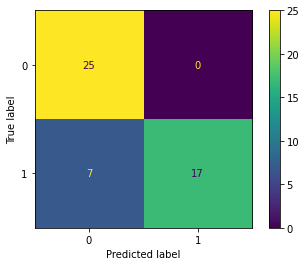

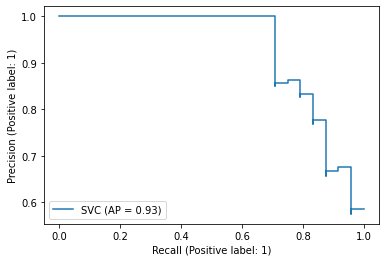

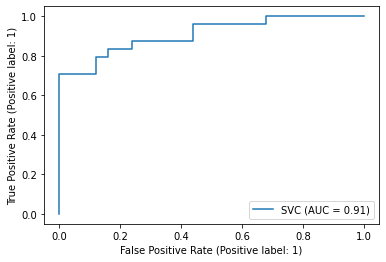

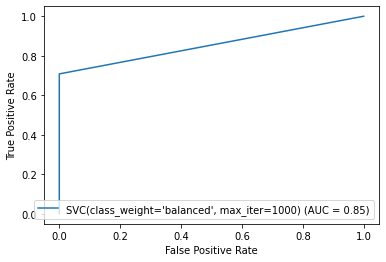

In [ ]:
#SVC
model_SVC=SVC(max_iter=1000,class_weight='balanced')
model_SVC.fit(trainX,trainY)
y_pred_Test = model_SVC.predict(testX)
y_pred_Train = model_SVC.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

SVCClassifier = SVC(max_iter=1000,class_weight='balanced')
SVCClassifier= SVCClassifier.fit(trainX, trainY)
plot_confusion_matrix(SVCClassifier,testX,testY)
plot_precision_recall_curve(SVCClassifier,testX,testY)
plot_roc_curve(SVCClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of SVC 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=SVCClassifier)
display.plot()

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(SVC(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(SVC(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.9411764705882353
1.0
0.9375
0.9375
1.0
0.875
0.9375
0.875
0.875
0.8125
0.9191176470588235


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
SVCClassifier = SVC()
cross_val_score = cross_val_score(SVCClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 86.50735294117646


## Grid_search on Support vector classifier

###**Repeating all with Grid search (fine tuning the hyperparameters)**

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarni

y_pred_KNN= [1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8775510204081632
Classification Report : 

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        25
           1       0.95      0.79      0.86        24

    accuracy                           0.88        49
   macro avg       0.89      0.88      0.88        49
weighted avg       0.89      0.88      0.88        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


The testing F1 Score is 0.8636363636363635
The testing Accuracy is 0.8775510204081632
best parameters are:  SVC(C=2.75, coef0=0, gamma='auto', kernel='linear')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


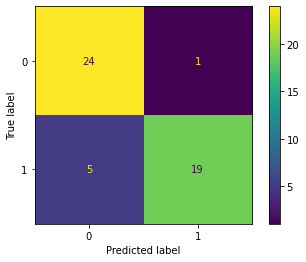

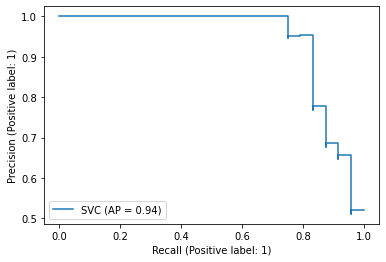

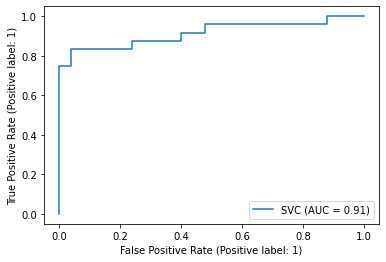

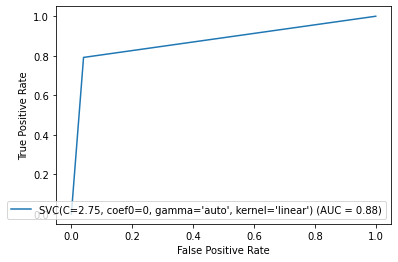

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score
from sklearn.svm import SVC #Imorting models repeatedly becuase of this error "'KNeighborsClassifier' object is not callable"
scorer = make_scorer(f1_score)
parameters = {'degree':[3,5,2,6],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'coef0':[0, 0.8, 0.6, 1.1],
              'gamma': ['auto'],'C':[1.0, 0.5, 2.75,2.5,3.25,3.75],'max_iter':[-1,5,10]}


clf = SVC()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(trainX,trainY)
best_clf = grid_fit.best_estimator_
best_clf.fit(trainX, trainY)

y_pred_Test = best_clf.predict(testX)
y_pred_Train = best_clf.predict(trainX)

test_acc = accuracy_score(testY, y_pred_Test)

print("y_pred_KNN=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))


plot_confusion_matrix(best_clf,testX,testY)
plot_precision_recall_curve(best_clf,testX,testY)
plot_roc_curve(best_clf,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of KNN
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=best_clf)
print('The testing F1 Score is', f1_score(y_pred_Test, testY))
print('The testing Accuracy is', accuracy_score(y_pred_Test, testY))
print('best parameters are: ',best_clf)
display.plot()

In [ ]:
#Stratified cross validation
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(best_clf, X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(best_clf, X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print('stratified_k-fold_results: ',statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

0.9411764705882353
0.875
0.875
1.0
0.875
0.875
0.9375
0.9375
0.75
0.875
stratified_k-fold_results:  0.8941176470588236


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
SVCClassifier = SVC()
cross_val_score = cross_val_score(SVCClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 86.50735294117646


## XGBoost

y_pred_xgb= [1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.8979591836734694
Classification Report : 

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       1.00      0.79      0.88        24

    accuracy                           0.90        49
   macro avg       0.92      0.90      0.90        49
weighted avg       0.91      0.90      0.90        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

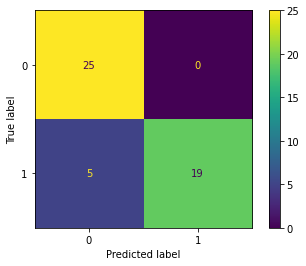

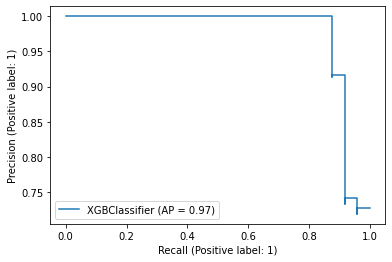

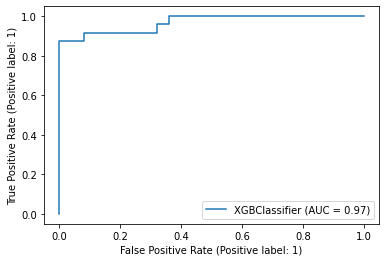

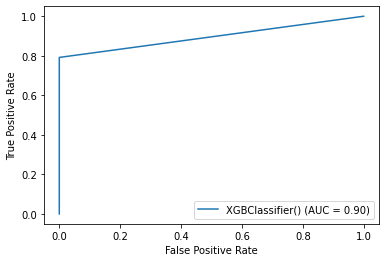

In [ ]:
#XGBoost
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(trainX,trainY)
y_pred_Test = model_xgb.predict(testX)
y_pred_Train = model_xgb.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

XGBClassifier = XGBClassifier()
XGBClassifier= XGBClassifier.fit(trainX, trainY)
plot_confusion_matrix(XGBClassifier,testX,testY)
plot_precision_recall_curve(XGBClassifier,testX,testY)
plot_roc_curve(XGBClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of XGBOOST 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=XGBClassifier)
display.plot()

In [ ]:
#Stratified cross validation 
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(XGBClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(XGBClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

1.0
1.0
1.0
1.0
0.9375
1.0
1.0
0.9375
0.9375
1.0
0.98125


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
cross_val_score = cross_val_score(XGBClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 96.39705882352942


## Grid_search on XGBoost

###**Repeating all with Grid search (fine tuning the hyperparameters)**

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score
from xgboost import XGBClassifier #Imorting models repeatedly becuase of this error "'KNeighborsClassifier' object is not callable"
scorer = make_scorer(f1_score)
parameters = {
    'max_depth': [2,3,4], #[2,3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.4,0.5,0.6], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5, 0.6,0.7], #[0.5,0.6,0.7,0.8],
    'n_estimators': [1000,2000], #[1000,2000,3000]
    'reg_alpha': [  0.02, 0.03, 0.04] #[0.01, 0.02, 0.03, 0.04]
    
}


clf = XGBClassifier()
grid_obj = GridSearchCV(clf, parameters,cv=10, scoring=scorer)
grid_fit = grid_obj.fit(trainX,trainY)
best_clf = grid_fit.best_estimator_
best_clf.fit(trainX, trainY)

y_pred_Test = best_clf.predict(testX)
y_pred_Train = best_clf.predict(trainX)

test_acc = accuracy_score(testY, y_pred_Test)

print("y_pred_XGBoost=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))


plot_confusion_matrix(best_clf,testX,testY)
plot_precision_recall_curve(best_clf,testX,testY)
plot_roc_curve(best_clf,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of KNN
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=best_clf)
print('The testing F1 Score is', f1_score(y_pred_Test, testY))
print('The testing Accuracy is', accuracy_score(y_pred_Test, testY))
print('best parameters are: ',best_clf)
display.plot()

no respose from grid search, I started to use randomized search in order to lower the computational complexity of search space.

# RandomizedSearch on XGBoost

In [ ]:
#%%time
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


parameters = {
    'max_depth': [2,3,4], #[2,3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.4,0.5,0.6], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.5, 0.6,0.7], #[0.5,0.6,0.7,0.8],
    'n_estimators': [1000,2000], #[1000,2000,3000]
    'reg_alpha': [  0.02, 0.03, 0.04] #[0.01, 0.02, 0.03, 0.04]
    
}
random_search=RandomizedSearchCV(estimator = XGBClassifier(), param_distributions=parameters,verbose=1, n_jobs=-1,
                            n_iter=100)
random_result = random_search.fit(trainX, trainY)
print('Best Score: ', random_result.best_score_*100)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score:  96.44268774703558
Best Params:  {'subsample': 0.5, 'reg_alpha': 0.04, 'n_estimators': 2000, 'max_depth': 2, 'colsample_bytree': 0.6}


So, now that we know best paramaters in terms of accuracy, we use them on the regular XGBoost model

y_pred_xgb= [1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 1 0 0 0 1 0 0]
Test accuracy Report:      0.9387755102040817
Classification Report : 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.88      0.93        24

    accuracy                           0.94        49
   macro avg       0.95      0.94      0.94        49
weighted avg       0.95      0.94      0.94        49

Classification Report train : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        52

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`

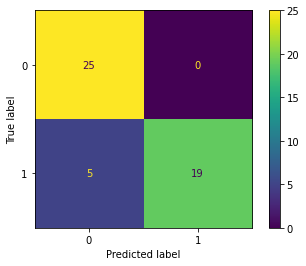

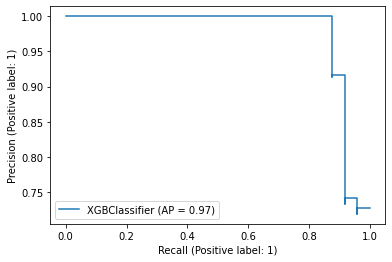

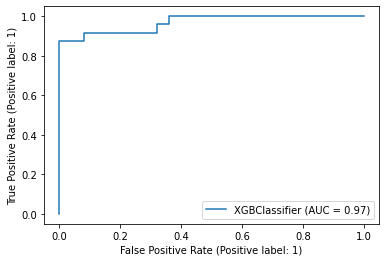

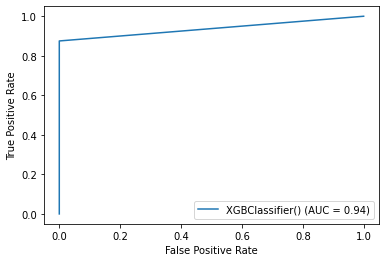

In [12]:
#XGBoost
from xgboost import XGBClassifier
model_xgb=XGBClassifier(subsample = 0.5, reg_alpha= 0.04, n_estimators= 2000, max_depth= 2, colsample_bytree= 0.6)
model_xgb.fit(trainX,trainY)
y_pred_Test = model_xgb.predict(testX)
y_pred_Train = model_xgb.predict(trainX)
test_acc = accuracy_score(testY, y_pred_Test)
print("y_pred_xgb=",y_pred_Test)
#print("acc= ",acc,'\n')
print("Test accuracy Report:     ", test_acc)
print("Classification Report : \n")
print(classification_report(testY, y_pred_Test)) 
print("Classification Report train : \n")
print(classification_report(trainY,y_pred_Train))

XGBClassifier = XGBClassifier()
XGBClassifier= XGBClassifier.fit(trainX, trainY)
plot_confusion_matrix(XGBClassifier,testX,testY)
plot_precision_recall_curve(XGBClassifier,testX,testY)
plot_roc_curve(XGBClassifier,testX,testY)
fpr,tpr,threshold = roc_curve(testY,y_pred_Test)
roc_auc = auc(fpr, tpr) #------ auc of XGBOOST 
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name=XGBClassifier)
display.plot()

In [14]:
#Stratified cross validation 
print("Stratified K-fold cross validation Report on accuracy : \n")
from sklearn.model_selection import StratifiedKFold as skf
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

accuracy =[]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

import statistics
skf = skf(n_splits=10,shuffle = True , random_state = 26)
skf.get_n_splits(features,health_state)
for train_index,test_index in skf.split(features,health_state):
    X1_train,X1_test = features[train_index], features[test_index]
    y1_train,y1_test = health_state[train_index], health_state[test_index]
    print(f"{get_score(XGBClassifier(), X1_train, X1_test, y1_train, y1_test)}")
    score = get_score(XGBClassifier(), X1_train, X1_test, y1_train, y1_test)
    accuracy.append(score)

print(statistics.mean(accuracy))

Stratified K-fold cross validation Report on accuracy : 

1.0
1.0
1.0
1.0
0.9375
1.0
1.0
0.9375
0.9375
1.0
0.98125


In [15]:
#cross validation
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
XGBClassifier = XGBClassifier()
cross_val_score = cross_val_score(XGBClassifier,features, health_state,cv=10)
cross_val_score_final_report = cross_val_score.mean()*100
print("mean of K_fold_CV_Score is =",cross_val_score_final_report)

mean of K_fold_CV_Score is = 96.39705882352942


As a result It's obviously clear that our random forest model does best on our data. Even though the accuracy is higher for XGBoost after finetuning, we choose random forest because of precision and recall measures. Accuracy is dwindled on randomforest after grid search, notwithstanding the demise on accuracy, we choose it because precision and recall results are better.


# RANDOM FOREST IS CHOSEN! ✨